In [2]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree, Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from PIL import Image


pixel_num = 512
ommatidia_size = 8

In [3]:
right_visual_neurons_df = pd.read_csv(
    "adult_data/right_visual_neurons_positions.csv"
).drop(columns=["x"])

FileNotFoundError: [Errno 2] No such file or directory: 'adult_data/right_visual_neurons_positions.csv'

In [15]:
# sample n_centers random points with ommatidia_size neurons, in average, each
n_centers = right_visual_neurons_df.shape[0] // ommatidia_size
rand_points = right_visual_neurons_df[["y", "z"]].sample(n_centers).values
# create the voronoi tree
tree = cKDTree(rand_points)
_, neuron_indices = tree.query(right_visual_neurons_df[["y", "z"]].values)

# create a grid of 512x512 where each point is just its own coordinates
img_coords = (
    np.array(np.meshgrid(np.arange(pixel_num), np.arange(pixel_num), indexing="ij"))
    .reshape(2, -1)
    .T
)
# apply the tree to the images grid
_, img_indices = tree.query(img_coords)

right_visual_neurons_df["voronoi_indices"] = neuron_indices
right_visual_neurons_df["cell_type"] = right_visual_neurons_df.apply(
    assign_cell_type, axis=1
)

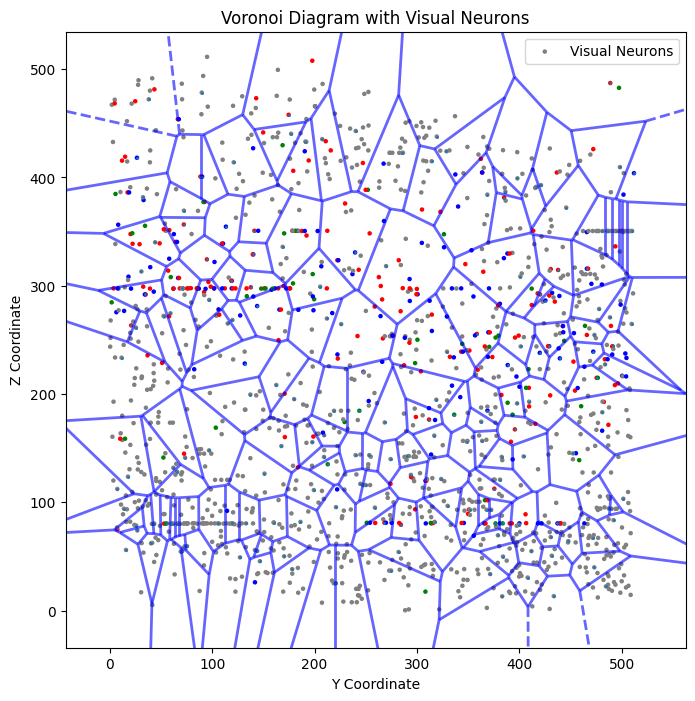

In [24]:
# Create a colormap
color_map = {"R1-6": "gray", "R7": "red", "R8p": "green", "R8y": "blue"}
colors = [color_map[typ] for typ in right_visual_neurons_df["cell_type"]]
right_visual_neurons_df["color"] = colors

vor = Voronoi(rand_points)

# Create a plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Voronoi diagram
voronoi_plot_2d(
    vor,
    ax=ax,
    show_vertices=False,
    line_colors="blue",
    line_width=2,
    line_alpha=0.6,
    point_size=2,
)

# Plot the visual neurons
ax.scatter(
    right_visual_neurons_df["y"],
    right_visual_neurons_df["z"],
    color=right_visual_neurons_df["color"],
    s=5,
    label="Visual Neurons",
)

# Enhance the plot
ax.set_title("Voronoi Diagram with Visual Neurons")
ax.set_xlabel("Y Coordinate")
ax.set_ylabel("Z Coordinate")
ax.legend()

# Show the plot
plt.show()

In [29]:
import os
import random

dir_ = "images/arthropods/train/yellow"
image_path = random.choice(os.listdir(dir_))
image = Image.open(os.path.join(dir_, image_path))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


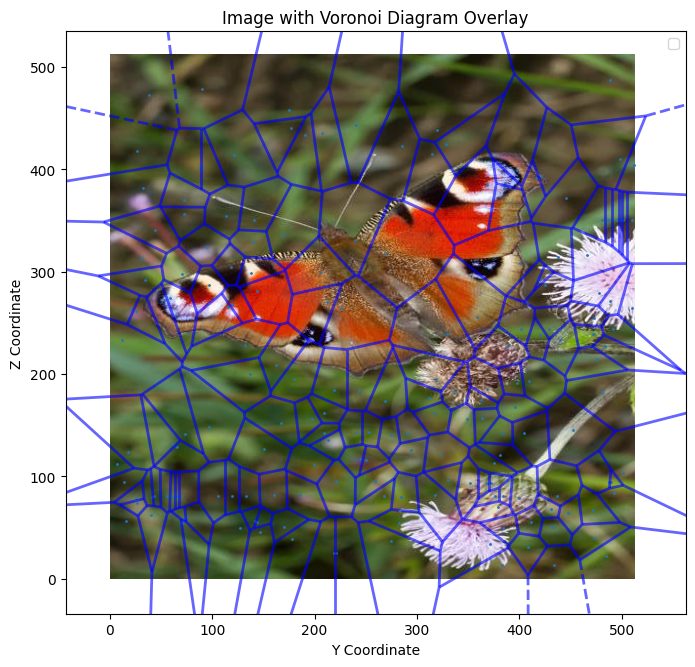

In [30]:
# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Display the image
ax.imshow(
    image, extent=[0, 512, 0, 512]
)  # Adjust extent if your coordinate system differs

# Plot Voronoi diagram
voronoi_plot_2d(
    vor,
    ax=ax,
    show_vertices=False,
    line_colors="blue",
    line_width=2,
    line_alpha=0.6,
    point_size=2,
)

ax.set_title("Image with Voronoi Diagram Overlay")
ax.set_xlabel("Y Coordinate")
ax.set_ylabel("Z Coordinate")
ax.legend()

# Show the plot
plt.show()